In [1]:
import pandas as pd

df = pd.read_csv('viral_short.csv')
df.head()

,Unnamed: 0,VideoID,CombinedText
0,0,0,what are the negative benefit or the negative ...
1,1,1,i had like a weird creepy teacher in high scho...
2,2,2,and what do you think girls want from men good...
3,3,3,about 10 million views on my main Channel just...
4,4,4,the way that students are able to get away wit...


In [4]:
df.drop(columns = 'Unnamed: 0', inplace=True)
df

,VideoID,CombinedText
0,0,what are the negative benefit or the negative ...
1,1,i had like a weird creepy teacher in high scho...
2,2,and what do you think girls want from men good...
3,3,about 10 million views on my main Channel just...
4,4,the way that students are able to get away wit...
...,...,...
61,61,airlines are regulated so that you don't die w...
62,62,we can observe the effects of gravity but we h...
63,63,and that that must have tested me a couple tim...
64,64,you are the same dude if you and I are going h...


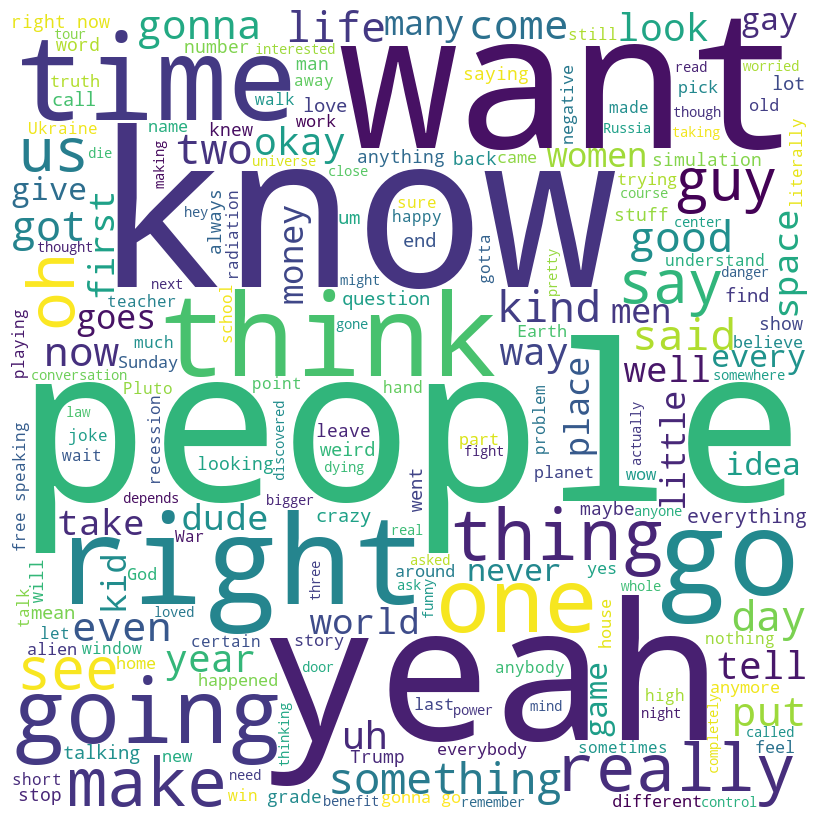

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'CombinedText' column
combined_text = " ".join(df['CombinedText'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

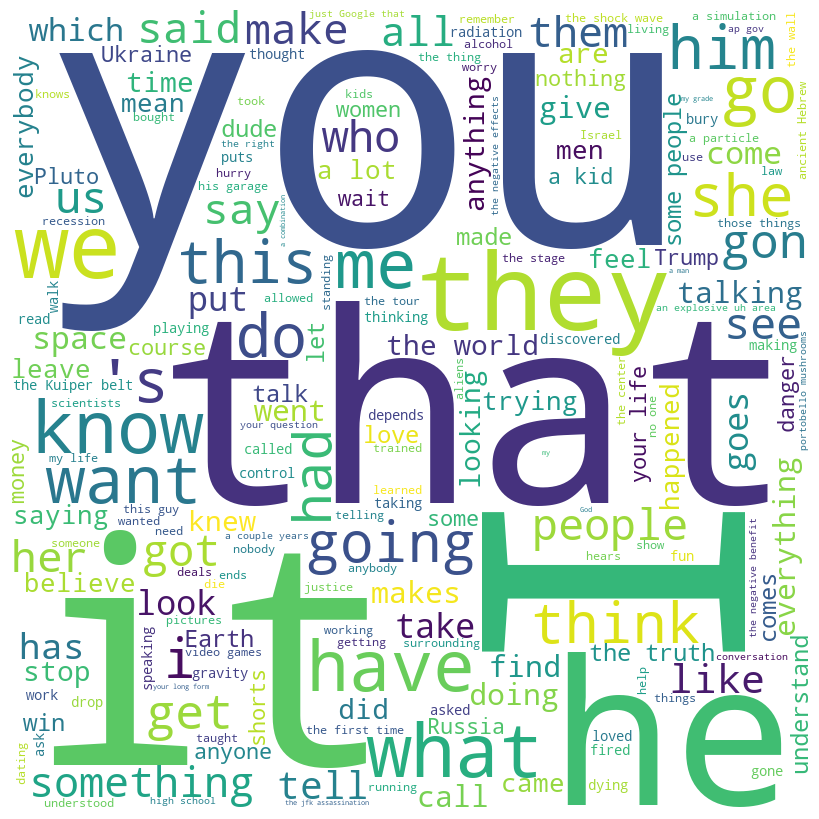

In [10]:
import pandas as pd
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'CombinedText' column
combined_text = " ".join(df['CombinedText'])

# Load spaCy English NLP model
nlp = spacy.load("en_core_web_sm")

# Process the text using spaCy
doc = nlp(combined_text)

# Extract noun phrases and verb phrases
phrases = []
for chunk in doc.noun_chunks:
    phrases.append(chunk.text)
for chunk in doc:
    if chunk.pos_ == "VERB":
        phrases.append(chunk.text)

# Count the occurrences of phrases
phrase_counts = Counter(phrases)

# Generate a word cloud based on phrase frequencies
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(phrase_counts)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [12]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'CombinedText' column
combined_text = " ".join(df['CombinedText'])

# Tokenize the text into words
words = combined_text.lower().split()

# Create phrases (n-grams) of specified length
n = 2  # Change this value for different phrase lengths
phrases = [' '.join(words[i:i + n]) for i in range(len(words) - n + 1)]

# Count the occurrences of phrases
phrase_counts = Counter(phrases)

# Create a pandas DataFrame from phrase frequencies
phrase_df = pd.DataFrame(phrase_counts.items(), columns=['Phrase', 'Frequency'])
phrase_df = phrase_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the DataFrame
print(phrase_df)


             Phrase  Frequency
0            in the         34
1          you know         25
2             and i         25
3             i was         21
4          going to         19
...             ...        ...
6065      they come          1
6066  spaceship and          1
6067    a spaceship          1
6068        build a          1
6069     i actually          1

[6070 rows x 2 columns]


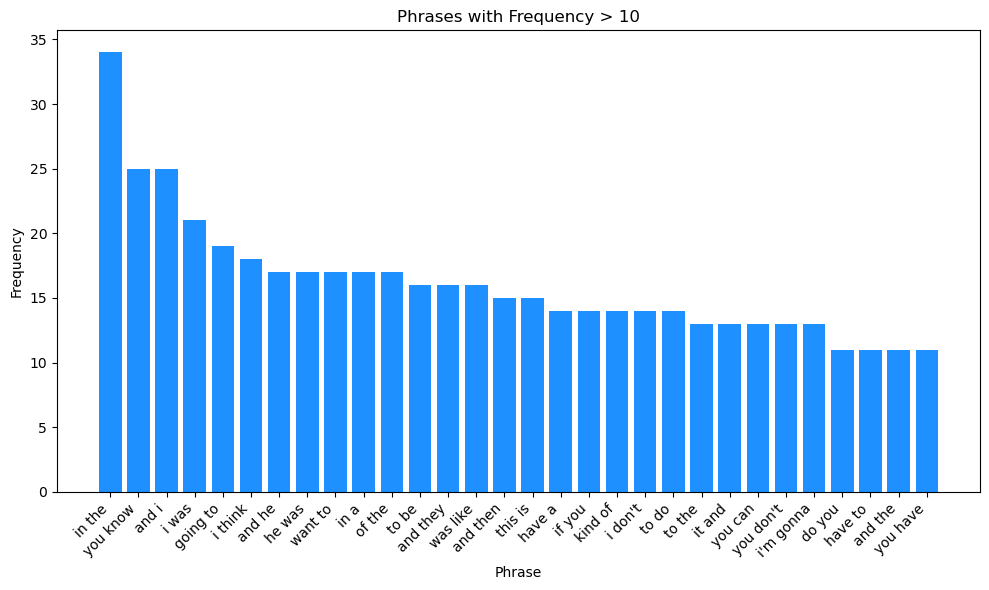

In [13]:
# Filter phrases with frequencies greater than 10
filtered_phrase_df = phrase_df[phrase_df['Frequency'] > 10]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(filtered_phrase_df['Phrase'], filtered_phrase_df['Frequency'], color='dodgerblue')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Phrase')
plt.ylabel('Frequency')
plt.title('Phrases with Frequency > 10')
plt.tight_layout()

plt.show()